In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import babet as bb
from moarpalettes import get_palette
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
from cmcrameri import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from moarpalettes import get_palette
import metpy.calc as mpcalc
from metpy.units import units

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

/home/e/ermis/Storm_Babet/babet/met.py:81: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(temperature.mean().values > 200, 'Temperature needs to be in K')
/home/e/ermis/Storm_Babet/babet/met.py:82: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(levels.mean().values < 1000, 'Pressure levels need to be in hPa')


In [2]:
color_palette = get_palette.Petroff6().to_sn_palette()
color_palette

[(0.3411764705882353, 0.5647058823529412, 0.9882352941176471),
 (0.9725490196078431, 0.611764705882353, 0.12549019607843137),
 (0.8941176470588236, 0.1450980392156863, 0.21176470588235294),
 (0.5882352941176471, 0.2901960784313726, 0.5450980392156862),
 (0.611764705882353, 0.611764705882353, 0.6313725490196078),
 (0.47843137254901963, 0.12941176470588237, 0.8666666666666667)]

In [3]:
# Plot settings
uk = [-10.5, 9.5, 45.5, 61.3] # longitude min, longitude max, latitude min, latitude max
northsea = [-17, 20, 40, 70]

# Load data

In [4]:
# pgw = bb.data.Data.get_pgw_ensemble() # old runs
pgw = bb.data.Data.get_pgw_new_runs()

Importing data from pre-existing file


In [5]:
# Old PGW runs

# # check if file exists
# if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_clean_dynamics.nc'):
#     # qvi
#     tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_qvi_past.nc').expand_dims(climate=["1870"])
#     tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_qvi_prst.nc').expand_dims(climate=["present"])
#     tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_qvi_fut1.nc').expand_dims(climate=["future1"])
#     tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_qvi_fut2.nc').expand_dims(climate=["future2"])
#     tmp = xr.concat([tmp1, tmp2, tmp3, tmp4], dim="climate").rename({"unknown": "qvi"})

#     ds = xr.Dataset(
#         data_vars=dict(
#             qvi=(["climate", "time", "lat", "lon"], tmp.qvi.values)),
#         coords=dict(
#             lon=tmp.lon.values[0,:],
#             lat=tmp.lat.values[:,0],
#             time=tmp.time.values,
#             climate=tmp.climate.values),
#         attrs=dict(description="PGW data"))

#     # upward latent heat flux
#     tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_latf_past.nc').expand_dims(climate=["1870"])
#     tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_latf_prst.nc').expand_dims(climate=["present"])
#     tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_latf_fut1.nc').expand_dims(climate=["future1"])
#     tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_latf_fut2.nc').expand_dims(climate=["future2"])
#     tmp = xr.concat([tmp1, tmp2, tmp3, tmp4], dim="climate").rename({"unknown": "latf"})
#     pgw_dynamics = xr.merge([ds,
#                     xr.Dataset(data_vars=dict(
#                             latf=(["climate", "time", "lat", "lon"], tmp.latf.values)),
#                             coords=dict(lon=tmp.lon.values[0,:],
#                                     lat=tmp.lat.values[:,0],
#                                     time=tmp.time.values,
#                                     climate=tmp.climate.values),
#                             attrs=dict(description="PGW data"))], 
#                     compat="override")

#     # Save to netcdf
#     pgw_dynamics.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_clean_dynamics.nc')
# else:
#     print('Importing data from pre-existing file')
#     pgw_dynamics = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW/pgw_clean_dynamics.nc')

In [6]:
# New PGW runs

# check if file exists
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_clean_dynamics_new_runs.nc'):
    # temperature
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp4_expid_-1.5K.nc').expand_dims(climate=["1870"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp0_expid_CTL.nc').expand_dims(climate=["present"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp1_expid_+1.5K.nc').expand_dims(climate=["future1"])
    # tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_qvi_fut2.nc').expand_dims(climate=["future2"])
    tmp = xr.concat([tmp1, tmp2, tmp3], dim="climate")
    tmp = bb.data.Data.regrid_racmo(tmp)

    ds = xr.Dataset(
        data_vars=dict(
            t=(["climate","member", "level", "lat", "lon"], tmp.t.values)),
        coords=dict(
            member=tmp.mem.values,
            level=tmp.pressure.values/100,
            lon=tmp.lon.values,
            lat=tmp.lat.values,
            climate=tmp.climate.values),
        attrs=dict(description="PGW data"))

    # vertical velocity
    pgw_dynamics = xr.merge([ds,
                    xr.Dataset(data_vars=dict(
                            w=(["climate", "member", "level", "lat", "lon"], tmp.wp.values)),
                            coords=dict(
                                    member=tmp.mem.values,
                                    level=tmp.pressure.values/100,
                                    lon=tmp.lon.values,
                                    lat=tmp.lat.values,
                                    climate=tmp.climate.values),
                            attrs=dict(description="PGW data"))], 
                    compat="override")

    # Save to netcdf
    pgw_dynamics.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_clean_dynamics_new_runs.nc')
else:
    print('Importing data from pre-existing file')
    pgw_dynamics = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_clean_dynamics_new_runs.nc')

Importing data from pre-existing file


In [8]:
pgw = pgw.assign({'av_w': bb.met.Met.calc_vert_velocity_average(pgw_dynamics.w, pgw_dynamics.level, pgw_dynamics.t)})

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/pint/quantity.py:1309: RuntimeWarning: divide by zero encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [9]:
# pgw_tempmean = pgw_dynamics.sel(time=slice('2023-10-19 00', '2023-10-22 00')).mean(dim='time').compute() # needed for old runs
pgw_tempmean = pgw_dynamics.mean(dim='member').compute()
# pgw_sfc_tempmean = pgw.sel(time=slice('2023-10-19 00', '2023-10-22 00')).mean(dim=['time', 'member']).compute()
pgw_sfc_tempmean = pgw.mean(dim='member').compute()

In [10]:
pgw_sfc_tempmean

Magnitude,[[[1.0445147381688002e-05 0.0 0.0 ... 0.0 0.0 0.0] [0.13366594910621643 0.3032854497432709 0.016711430624127388 ... 0.0 0.0 0.0] [0.5428351163864136 0.8384412527084351 0.4355250298976898 ... 0.0 0.0 0.0] ... [1.1392592191696167 1.108442783355713 1.073840618133545 ... -1.0858229398727417 -1.2282893657684326 -1.3338183164596558] [1.1763907670974731 1.1240737438201904 1.0753086805343628 ... -1.1017276048660278 -1.2458975315093994 -1.3471004962921143] [1.2061504125595093 1.135288953781128 1.0719916820526123 ... -1.3289780616760254 -1.3353735208511353 -1.3358876705169678]] [[3.5850735002895817e-07 0.0 0.0 ... 0.0 0.0 0.0] [0.129946768283844 0.29272860288619995 0.00899999774992466 ... 0.0 0.0 0.0] [0.5373712778091431 0.8265799880027771 0.4214884340763092 ... 0.0 0.0 0.0] ... [1.3311277627944946 1.2829046249389648 1.2571091651916504 ... -1.0136932134628296 -1.145052433013916 -1.237574577331543] [1.399524450302124 1.3587557077407837 1.3284540176391602 ... -1.0068879127502441 -1.135697364807129 -1.2216053009033203] [1.4577287435531616 1.4100260734558105 1.3708478212356567 ... -1.216155767440796 -1.2125988006591797 -1.2069978713989258]] [[9.834254342422355e-06 0.0 0.0 ... 0.0 0.0 0.0] [0.12871772050857544 0.2887228727340698 0.00471247173845768 ... 0.0 0.0 0.0] [0.5360317230224609 0.8232181072235107 0.41488009691238403 ... 0.0 0.0 0.0] ... [1.7597343921661377 1.6375255584716797 1.5494866371154785 ... -1.0158737897872925 -1.1353209018707275 -1.2172002792358398] [1.7038838863372803 1.6164542436599731 1.5492920875549316 ... -0.9954242706298828 -1.1144753694534302 -1.1903189420700073] [1.6527955532073975 1.6064703464508057 1.560512661933899 ... -1.1876511573791504 -1.1779588460922241 -1.165029764175415]] [[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]]]
Units,meter/second


# Plot

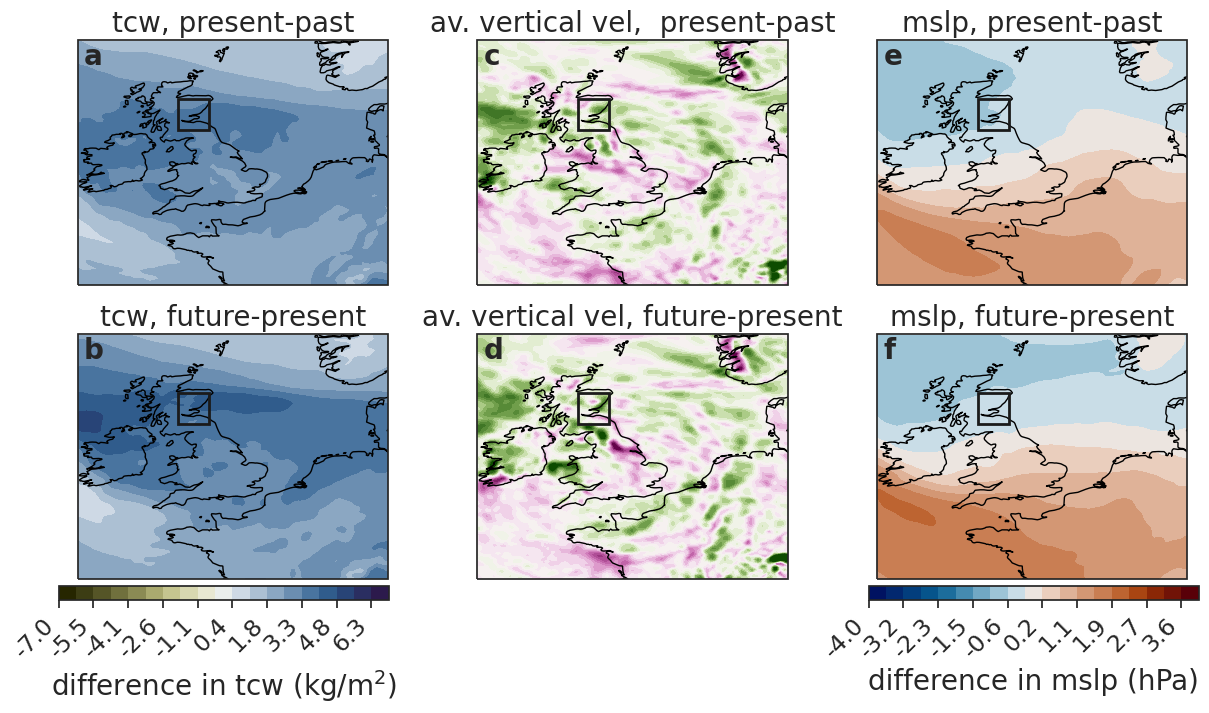

In [15]:
# Create figure
fs = 20
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot saturation specific humidity
vmax = 7
plot1 = (pgw_sfc_tempmean.sel(climate='present')-pgw_sfc_tempmean.sel(climate='1870')).squeeze().qvi.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0, 0], add_colorbar=False  # Disable individual colorbars
)
plot2 = (pgw_sfc_tempmean.sel(climate='future1')-pgw_sfc_tempmean.sel(climate='present')).squeeze().qvi.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1, 0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 1
plot3 = (pgw_sfc_tempmean.sel(climate='present')-pgw_sfc_tempmean.sel(climate='1870')).squeeze().av_w.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0,1], add_colorbar=False  # Disable individual colorbars
)
plot4 = (pgw_sfc_tempmean.sel(climate='future1')-pgw_sfc_tempmean.sel(climate='present')).squeeze().av_w.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1,1], add_colorbar=False  # Disable individual colorbars
)
# axes[0,1].set_visible(False)
# axes[1,1].set_visible(False)

# Plot mean sea level pressure
vmax = 4
plot5 = ((pgw_sfc_tempmean.sel(climate='present')-pgw_sfc_tempmean.sel(climate='1870')).msl/100).squeeze().plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0,2], add_colorbar=False  # Disable individual colorbars
)
plot6= ((pgw_sfc_tempmean.sel(climate='future1')-pgw_sfc_tempmean.sel(climate='present')).msl/100).squeeze().plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1,2], add_colorbar=False  # Disable individual colorbars
)

# Add horizontal colorbars
cbar_ax1 = fig.add_axes([0.12, 0.08, 0.22, 0.02])  # Bottom of first column
cbar1 = fig.colorbar(plot1, cax=cbar_ax1, orientation="horizontal", label="difference in tcw (kg/m$^2$)")
cbar1.ax.xaxis.set_label_position('bottom')
cbar1.set_label("difference in tcw (kg/m$^2$)", fontsize=fs)
cbar1.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar1.ax.tick_params(labelsize=fs-3)
cbar1.update_ticks()

# cbar_ax2 = fig.add_axes([0.395, 0.08, 0.22, 0.02])  # Bottom of second column
# cbar2 = fig.colorbar(plot3, cax=cbar_ax2, orientation="horizontal", label=r"difference in upward latent heat flux (kg/s$^3$)")
# cbar2.ax.xaxis.set_label_position('bottom')
# cbar2.formatter = FormatStrFormatter("%.0f")  # Restrict to 2 decimal places
# cbar2.update_ticks()

cbar_ax3 = fig.add_axes([0.66, 0.08, 0.22, 0.02])  # Bottom of third column
cbar3 = fig.colorbar(plot5, cax=cbar_ax3, orientation="horizontal", label="difference in mslp (hPa)")
cbar3.ax.xaxis.set_label_position('bottom')
cbar3.set_label("difference in mslp (hPa)", fontsize=fs)
cbar3.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar3.ax.tick_params(labelsize=fs-3)
cbar3.update_ticks()

for cbar in [cbar1, cbar3]:  
    for label in cbar.ax.get_xticklabels():  # For horizontal colorbars  
        label.set_rotation(45)  
        label.set_ha('right')  # Align labels to the right for better readability


# Add figure labels
axes[0, 0].text(0.02, 0.9, "a", transform=axes[0, 0].transAxes, fontsize=fs, fontweight="bold")
axes[1, 0].text(0.02, 0.9, "b", transform=axes[1, 0].transAxes, fontsize=fs, fontweight="bold")
axes[0, 1].text(0.02, 0.9, "c", transform=axes[0, 1].transAxes, fontsize=fs, fontweight="bold")
axes[1, 1].text(0.02, 0.9, "d", transform=axes[1, 1].transAxes, fontsize=fs, fontweight="bold")
axes[0, 2].text(0.02, 0.9, "e", transform=axes[0, 2].transAxes, fontsize=fs, fontweight="bold")
axes[1, 2].text(0.02, 0.9, "f", transform=axes[1, 2].transAxes, fontsize=fs, fontweight="bold")

# Apply Cartopy settings to both axes
titles = [f"tcw, present-past", f"av. vertical vel,  present-past", f"mslp, present-past",
         f"tcw, future-present", f"av. vertical vel, future-present",  f"mslp, future-present"]
for ax, title in zip(axes.flatten(), titles):
    ax.set_extent(uk, crs=ccrs.PlateCarree())  # Set map extent
    ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.8)  # Add land borders
    ax.add_feature(cfeature.OCEAN, facecolor='white')  # Mask ocean
    ax.coastlines()  # Add coastlines
    ax.set_title(title, fontsize=fs)  # Set

    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='k', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    ax.add_patch(rectangle)
    rectangle.set_zorder(17)
plt.subplots_adjust(right=0.88)

# Save the figure
plt.savefig('figures/D01_pgw_dynamics.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/D01_pgw_dynamics.pdf')